# 1.시계열 예측 방법론 

- 분해법 
- ARIMA, 시계열 회귀 분석
- 신경망 시계열 

# 2.시계열 예측모형구현 및 검증 방법 

- 시계열 예측 모델링 셋 및 테스트셋 
- 모형성능측정(MAPE)

# 3. 분석 및 예측 실습

시계열 파이썬 패키지 : prophet 사용하기

---

## 1-1. 시계열에 대한 소개 

시계열은 시간의 흐름에 따라 기록된 데이터를 의미합니다. 
- 따라서 현재와 과거의 데이터 사이에는 상관관계가 존재하게 됩니다.

<img src='./IMG/img1.png'>

예시 : 페이스북의 방문 시계열 데이터

시계열 예측이란 과거의 데이터를 기반으로 현재를 설명하고 미래를 예측하는 것을 의미합니다.

<img src = 'IMG/img2.png'>

예시 : 원유 수요 예측

거시 경제에 대한 지표들은 시계열 분석이 많이 적용되는 분야 (Econometrics)

- 추세(Trend)/ 계절성(Seasonality)/ 경기순환 (Cycle) 

<img src = 'IMG/img3.png'>

시계열이 회귀 분석(데이터)과 다른 점 

- x,y 사이의 관계 (correlation)와 달리 데이터(y)의 현재와 과거 사이의 관계 (autocorrelation) 

<img src = 'IMG/img4.png'>

데이터 분석은 수학적인 모형을 통해 관계를 설명 
- 다양한 형태의 모형이 가능 

1. 자기 상관 관계를 모형화 : ARIMA 
2. 시계열을 Trend & Seasonality로 분해 : 분해법 (Decomposition) 
3. 시계열 회귀 분석 : 회귀 모형과 시계열 모형을 함께 사용 
4. 분해법과 ARIMA를 함께 사용하는 모형 (TBATS) 
5. 신경망을 이용한 시계열 모형

## 1-2. 데이터 속성 및 시계열 객체 

시계열 분석을 위해서는 ts 오브젝트로 변환이 필요! 인덱스에 대한 ts 화가 필요합니다

## 1-3. 시계열 그래프 

시계열 분석에 있어서 그래프는 아주 중요한 요소입니다. 

In [40]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index("Month",inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


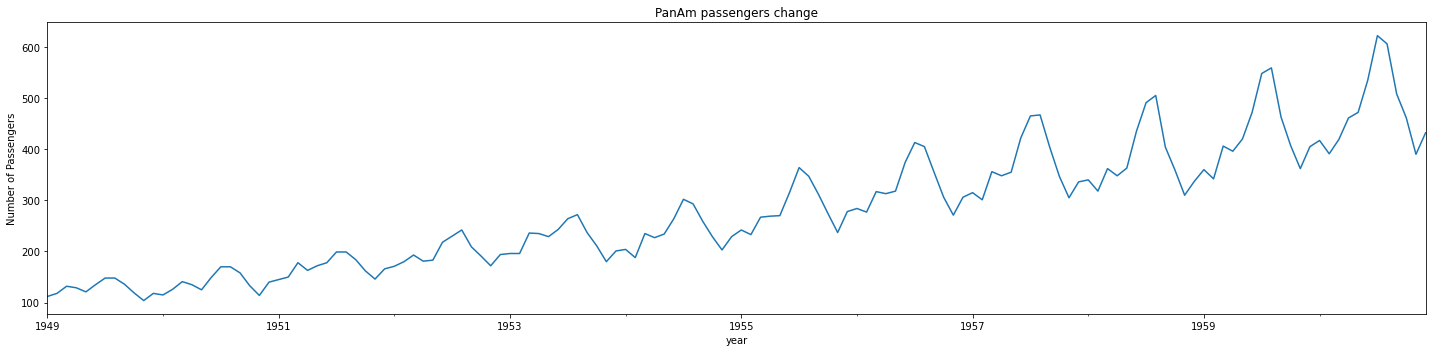

In [42]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import datetime

fig,ax = plt.subplots(figsize=[20,5])
df['Passengers'].plot(ax=ax)
ax.set_title("PanAm passengers change")
ax.set_ylabel("Number of Passengers")
ax.set_xlabel("year")
plt.tight_layout()
plt.show()

여기에서 조금 더 진행해보도록 하겠습니다. 

데이터 추세 (연도별+월별) 

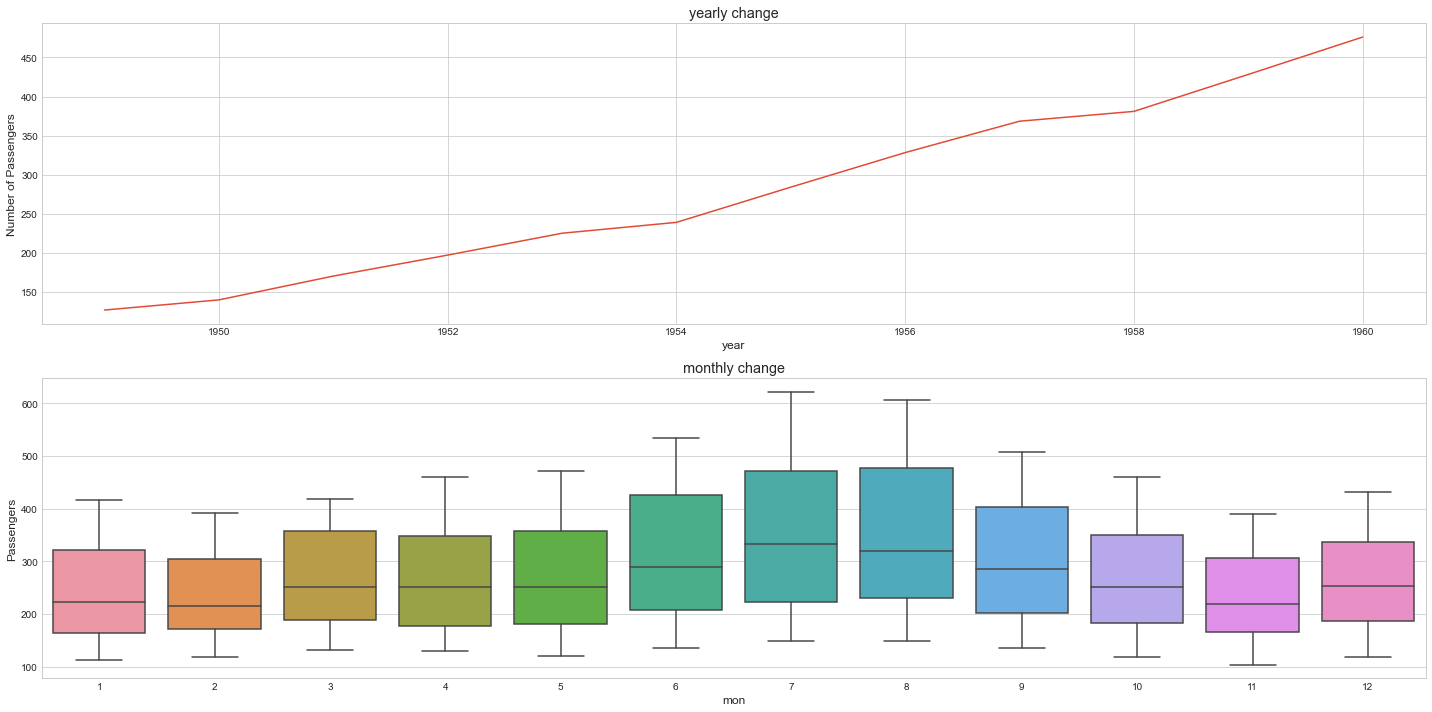

In [55]:
# df.reset_index(inplace=True)
plt.style.use('seaborn-whitegrid')
df['Year'] = df['Month'].dt.year
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=[20,10]) 
plt.subplot(2,1,1)
plt.title("yearly change")
df.groupby(['Year'])['Passengers'].mean().plot()
plt.xlabel("year");plt.ylabel("Number of Passengers")

plt.subplot(2,1,2)
plt.title("monthly change")
df['mon'] = df['Month'].dt.month
sns.boxplot(x= df['mon'],y= df['Passengers'])
plt.tight_layout()
plt.show()